## Assignment 1: Math Foundation and Programming

This assignment intends to:
- test your Python programming skills
- understand differentiation and gradients
- think classical regression problems with a deep learning mind

- Suppose you have a model $\hat{y} = \sigma(z)$, where: 
    - $ z= w^T x + b,~i.e.~z=w_1*x_1+w_2*x_2+w_3*x_3+b$, 
    - $\sigma$ is the sigmoid function, i.e. $\sigma(z) = \frac{1}{(1+e^{-z})}$, and
    - $w, b$ are parameters. $b$ is a scalar, $x,w~\in R^3$, specifically, $w = [w_1, w_2, w_3]^T$, $x = [x_1, x_2, x_3]^T$.
- Your ground truth lable $y=0~or~1$. You measure your model performance by two possible cost functions:
  - Squared error: $s=\frac{1}{2}(y-\hat{y})^2$
  - Cross entropy: $e=-[y*\ln{\hat{y}}+(1-y)*ln{(1-\hat{y})}]$
- Note, for simplicity, let's assume there is only 1 training sample.
- Following the instruction below to program your solution in Python notebook step by step carefully:

1. Write a function to calculate each of the following partial derivatives. The inputs to the function are all the variables in the formula and the returned derivatives are expressions of these variables. An example is given below.
   - $ \frac{\partial{z}}{\partial{w}}$. Note $ \frac{\partial{z}}{\partial{w}} \in R^{1x3}$
   - $ \frac{dz}{db}$
   - $ \frac{d{\hat{y}}}{d{z}}$
   - $ \frac{d{s}}{d{\hat{y}}}$
   - $ \frac{d{e}}{d{\hat{y}}}$

2. Write a function $gradient\_desc$ ($v$, $dev$, $\lambda$) to adjust a parameter value ($v$) by its gradient ($dev$), i.e. return the new value of parameter $v$ as $v$ $\leftarrow$ $v-\lambda*dev$, where $\lambda$ is the learning rate.

3. Write a function train($x, y, w_0, b_0, loss_fun, \lambda, r$) as follows:
   1. Initialize $w$, $b$ with w_0, b_0
   2. Use a loop of $r$ rounds to do the following
       1. Calculate $\hat{y}$, and errors $s$ or $e$ depending on the value of the loss function $loss\_fun$
       2. Use chain rule to calculate the partial derivatives $\frac{\partial{s}}{\partial{w}}, \frac{\partial{s}}{\partial{b}}, \frac{\partial{e}}{\partial{w}}, \frac{\partial{e}}{\partial{b}}$
       3. Update $w, b$ using the function $gradient\_desc$
       4. record $\hat{y}$, $s$, $e$
   3. Return the history of $\hat{y}$, and $s$ or $e$ depending on the value $loss\_fun$

4. Test your program with these two test cases and plot the history of loss $s, e$ (i.e. learning curves) respectively. Sample plots have been given.
    1. Case 1: $x=[1,0.5,-2]^T, y=1, w_0=[-1,-2,1]^T, b_0=-1, \lambda = 0.1$
    2. Case 2: $x=[1,0.5,-2]^T, y=1, w_0=[-3,-2,2]^T, b_0=-20,  \lambda = 0.1$


5. Analyze the differences between these two learning curves. Can you explain the differences in these two cases by using $\hat{y}$ and the derivaties, i.e. $ \frac{d{s}}{d{z}}, \frac{d{e}}{d{z}}$? For example, it can be shown that $\frac{d{s}}{d{z}} = (\hat{y}-y)*\hat{y}*(1-\hat{y})$. <b>Write down your analysis at the end of your jupyter notebook as markdowns</b>.

<b>Please submit your solution using Jupyter Notebook </b>

In [10]:
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt


### 1.Method

We want to use simple dataset to simulate two different Gradient Descent Formula.
- Squared error: $s=\frac{1}{2}(\hat{y}-y)^2$
- Cross entropy: $e=-[y*\ln{\hat{y}}+(1-y)*ln{(1-\hat{y})}]$
In order to, input <code>x</code> hide behind three layer partial derivateve.If we want to minimize loss function(Squared Error or Cross Entropy), we have to find two partial derivative of two loss function and use $\lambda$ as learning rate(adjusting rate) to gradually change paramter value ($v$) Actully this $v$ will replace by $w$ and $b$ and these two parameters will be modified by it's own derivative

In this step, we don't use any derivative function, we just use current formula to get result. Matining the same 

### 2. Defination basic function

- this part we only need calcuate these partitial derivative,
- We should mentention here, if we all only use (w,x,b) as our input, the function and program will be more concise
We only need to caculate two partial derivate
- This for Squard Error
- <font size="5"> $\frac{d{s}}{d{{w}}}$ = $\frac{\partial{s}}{\partial{\hat{y}}}$ $*$ $ \frac{\partial{\hat{y}}}{\partial{z}}$ $*$ $\frac{\partial{z}}{\partial{w}}$</font>
 
- <font size="5"> $\frac{d{s}}{d{{b}}}$ = $\frac{\partial{s}}{\partial{\hat{y}}}$ $*$ $ \frac{\partial{\hat{y}}}{\partial{z}}$ $*$ $\frac{\partial{z}}{\partial{b}}$</font>

- This for Cross Entropy
- <font size="5">$\frac{d{e}}{d{{w}}}$ = $\frac{\partial{e}}{\partial{\hat{y}}}$ $*$ $ \frac{\partial{\hat{y}}}{\partial{z}}$ $*$ $\frac{\partial{z}}{\partial{w}}$ </font>
- <font size="5"> $\frac{d{e}}{d{{b}}}$ = $\frac{\partial{e}}{\partial{\hat{y}}}$ $*$ $ \frac{\partial{\hat{y}}}{\partial{z}}$ $*$ $\frac{\partial{z}}{\partial{w}}$</font>
 

 
 You can see we only have five partial derivate formulas to caculate

In [58]:
#I don't konw why here i use inverse x is not correct
def dz_dw(w, x, b):
    return x.T

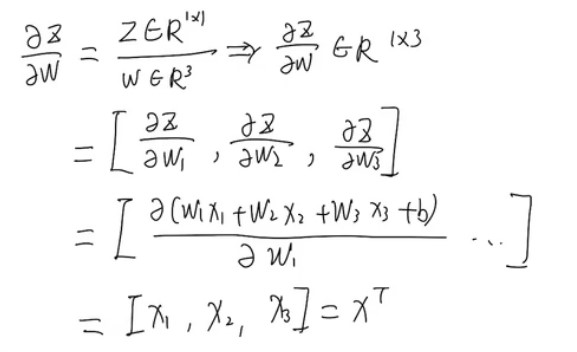

In [33]:
Image(filename="04_Images/01.jpg")

In [34]:
# z and b are both scalar some derivate result is 1 
def dz_db(w, x, b):
    return 1

In [47]:
#I recommand just use w x b as our input althrough this pattern will increase computation but more concise
def dy_dz(w,x,b):
    z=(np.dot(w.T,x)+b)
    return (1/(1+np.exp(-z))*(1-1/(1+np.exp(-z))))

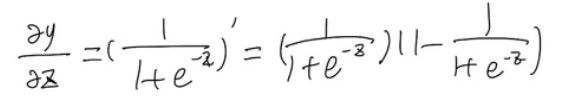

In [23]:
Image(filename="04_Images/02.jpg")

In [36]:
def ds_dy(w, x, b):
    y_hat=1/(1+np.exp(-w.T.dot(x)-b))
    return y_hat-y

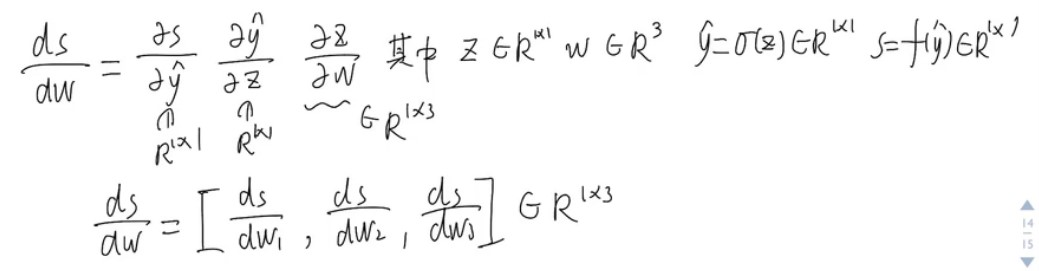

In [26]:
Image(filename="04_Images/03.jpg")

In [37]:
def de_dy(w, x, b, y):
    y_hat=1/(1+np.exp(-w.T.dot(x)-b))
    return ((1-y)/(1-y_hat)-y/y_hat)

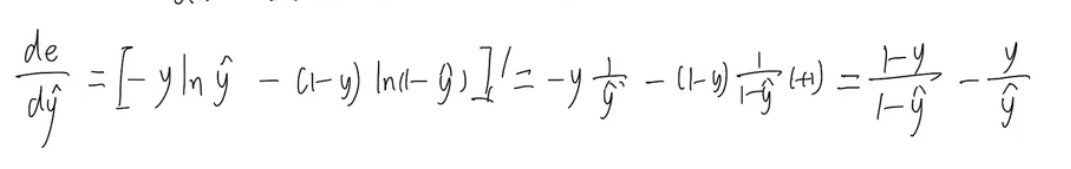

In [27]:
Image(filename="04_Images/04.jpg")

In [65]:
#We use this simple formula to caculate w and b
#We should add a transe for dev(derivative) to make sure new parameter v is column vector
def gradient_desc(v, dev, lam):
    v=v-lam*dev.T
    return v

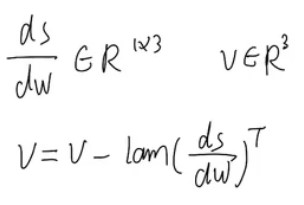

In [66]:
Image(filename="04_Images/05.jpg")

In [41]:
def loss_fun_s(w,x,b,y):
    y_hat=1/(1+np.exp(-w.T.dot(x)-b))
    s = 1/2 * ((y_hat - y)**2)
    return s,y_hat

In [42]:
def loss_fun_e(w,x,b,y):
    y_hat=1/(1+np.exp(-w.T.dot(x)-b))
    e = (-1* y * np.log(y_hat))-((1-y) * np.log(1-y_hat))
    return e,y_hat

In [60]:
#this is main function, we start from here
#i did't use if function to judge Squarrd or CrossEnopy, i just built two seperate def
def train_s(x, y, w0, b0, loss_fun, lam, r):
    w=w0
    b=b0
    #s_history is a list to record all caculation result of Squard Error 
    s_history=np.zeros(r)    
    #s_prediction is y_hat,is the new paramter(wb) caculation result, it should be more and more close to y_real(y)
    y_hat_prediction=np.zeros(r) 
    #Although we only have one data point, but we still can iterate 500 times
    for i in range(1,r):
        #We have a restrict order
        #in here, we must caculate derivative first and then use gradient descent to give wb new value
        ds_dw = ds_dy(w, x, b) * dy_dz(w, x, b) * dz_dw(w, x, b)
        ds_db = ds_dy(w, x, b) * dy_dz(w, x, b) * dz_db(w, x, b)
        w=gradient_desc(w,ds_dw,lam)
        b=gradient_desc(b,ds_db,lam)    
        s_history[i],y_hat_prediction[i]=(loss_fun_s(w,x,b,y))
    return s_history,y_hat_prediction

In [61]:
def train_e(x, y, w0, b0, loss_fun, lam, r):
    w=w0
    b=b0
    e_history=np.zeros(r) 
    y_hat_prediction=np.zeros(r)
    for i in range(1,r):
        de_dw = de_dy(w, x, b, y) * dy_dz(w,x,b) * dz_dw(w, x, b)
        de_db = de_dy(w, x, b, y) * dy_dz(w, x, b) * dz_db(w, x, b)  
        w=gradient_desc(w,de_dw,lam)
        b=gradient_desc(b,de_db,lam)
        e_history[i],y_hat_prediction[i]=loss_fun_e(w,x,b,y)
    return e_history,y_hat_prediction

In [62]:
if __name__ == '__main__':
    
    # case 1:
    x=np.array([[1],
                [0.5],
                [-2]])
    w0=np.array([[-1],
                 [-2],
                 [1]])
    b0=-1
    y=1
    w=w0
    b=b0
    lam = 0.1    #learning rate = 0.1
    r = 500      #iteration 500 times
    z = w.T.dot(x) + b
    
    # add your code
    s=loss_fun_s(w,x,b,y)
    e=loss_fun_e(w,x,b,y)
    
    
    s_history,s_y_hat_prediction=train_s(x,y,w,b,s,lam,r)
    #print(s_history)
    e_history,e_y_hat_prediction=train_e(x,y,w,b,e,lam,r)
    #print(e_prediction)
    

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


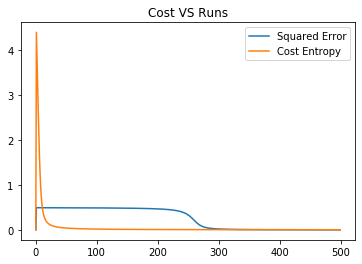

In [64]:
horizon=list(range(0,500))
p1=plt.plot(horizon,s_history)
p2= plt.plot(horizon,e_history)
plt.title("Cost VS Runs")
plt.legend([p1,p2],labels=['Squared Error','Cost Entropy'],loc=1)
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


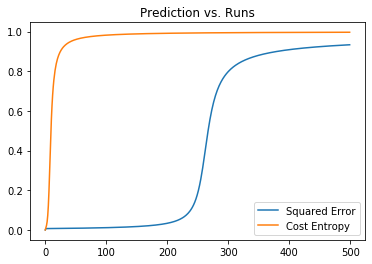

In [27]:
p3=plt.plot(horizon,s_prediction)
p4=plt.plot(horizon,e_prediction)
plt.title("Prediction vs. Runs")
plt.legend([p3,p4],labels=['Squared Error','Cost Entropy'],loc=0)
plt.show()

<br>

<br>

<br>

<br>

<br>

In [28]:
   
    # case 2:
    x=np.array([[1],
                [0.5],
                [-2]])
    w0=np.array([[-3],
                 [-2],
                 [2]])
    b0=-1
    y=1
    w=w0
    b=b0
    lam = 0.1
    r = 500
    z = w.T.dot(x) + b
    
    s=loss_fun_s(w,x,b,y)
    e=loss_fun_e(w,x,b,y)
    
    
    s_history,s_y_hat_prediction=train_s(x,y,w,b,s,lam,r)
    print(s_history)
    e_history,e_y_hat_prediction=train_e(x,y,w,b,e,lam,r)
    print(e_history)
    

[0.         0.4998766  0.49987659 0.49987658 0.49987657 0.49987657
 0.49987656 0.49987655 0.49987654 0.49987653 0.49987652 0.49987651
 0.4998765  0.49987649 0.49987648 0.49987647 0.49987646 0.49987645
 0.49987644 0.49987643 0.49987642 0.49987641 0.4998764  0.49987639
 0.49987638 0.49987637 0.49987637 0.49987636 0.49987635 0.49987634
 0.49987633 0.49987632 0.49987631 0.4998763  0.49987629 0.49987628
 0.49987627 0.49987626 0.49987625 0.49987624 0.49987623 0.49987622
 0.49987621 0.4998762  0.49987619 0.49987618 0.49987617 0.49987616
 0.49987615 0.49987615 0.49987614 0.49987613 0.49987612 0.49987611
 0.4998761  0.49987609 0.49987608 0.49987607 0.49987606 0.49987605
 0.49987604 0.49987603 0.49987602 0.49987601 0.499876   0.49987599
 0.49987598 0.49987597 0.49987596 0.49987595 0.49987594 0.49987593
 0.49987592 0.49987591 0.49987591 0.4998759  0.49987589 0.49987588
 0.49987587 0.49987586 0.49987585 0.49987584 0.49987583 0.49987582
 0.49987581 0.4998758  0.49987579 0.49987578 0.49987577 0.4998

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


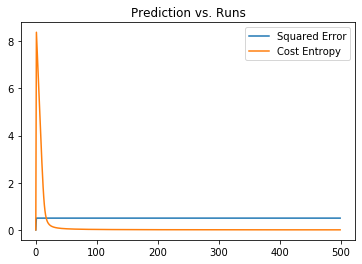

In [29]:
p5=plt.plot(horizon,s_history)
p6= plt.plot(horizon,e_history)
plt.title("Prediction vs. Runs")
plt.legend([p5,p6],labels=['Squared Error','Cost Entropy'],loc=0)
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


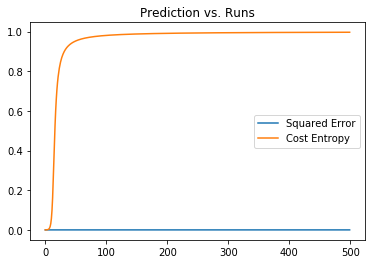

In [30]:
p7=plt.plot(horizon,s_y_hat_prediction)
p8=plt.plot(horizon,e_y_hat_prediction)
plt.title("Prediction vs. Runs")
plt.legend([p7,p8],labels=['Squared Error','Cost Entropy'],loc=0)
plt.show()

### Question 5

- The only different between these two data set it the initial w1(the first element of w), So the inital start point is very sensitive to gradient descent. And we can see Data set 2 did change it's sigmod loss functio from begining. Maybe this point is already the local optimical minizie for this dataset and gradient descent can't find global minization.
- After a instert a moniter to see vecter w, we can see in case 2,vecter w is actully never change from first begining, which means 
$ \frac{d{\hat{y}}}{d{w}}$ = 0 and 
after first caculation. So this is weakness of Squared Loss fucntion and can be avoid by Cost Entropy Lost Functoin.

In [ ]:
#test model
x=np.array([[1],
                [0.5],
                [-2]])
w0=np.array([[-1],
                 [-2],
                 [1]])
b0=-1
y=1
w=w0
b=b0
lam = 0.1    #learning rate = 0.1
r = 500      #iteration 500 times
z = w.T.dot(x) + b
    
test_1 = dz_dw(w,x,b)
test_2=dy_dz(w,x,b)
test_3=ds_dy(w,x,b)
test_4 =  ds_dw = ds_dy(w, x, b) * dy_dz(w, x, b) * dz_dw(w, x, b)

print(test_4)